# Task 1: Feature Selection Schemes

In this assignment you will understand Feature selection techniques

###Forward Selection: 
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

###Backward Elimination: 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

###Recursive Feature elimination: 
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

##Dataset
The dataset is available at "data/bank-full.csv" in the respective challenge's repo.
The dataset can be obtained from:
https://www.kaggle.com/sonujha090/bank-marketing

#Features (X)
##Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

##Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')

#### Objective
- To apply different feature selection approaches such as Forward Selection, Backward Elimination and recursive feature elimination for feature selection in Logistic Regression Algorithm.


#### Tasks
- Download and load the data (csv file)
- Process the data 
- Split the dataset into 70% for training and rest 30% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression
- Apply feature selection techniques
- Train the models on the feature reduced datasets
- Compare their accuracies and print feature subset

#### Further Fun
- Perform feature selection with other schemes in the Sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection|

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Feature selection in ML: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- Feature selection in sklearn: https://scikit-learn.org/stable/modules/feature_selection.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g




In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

In [23]:
banking =  pd.read_csv("bank-full.csv")

In [24]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [25]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [26]:
banking.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [27]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [28]:
banking.shape

(45211, 17)

In [29]:
banking.rename(columns={"y":"Action"},inplace = True)

In [30]:
banking.Action.value_counts()

no     39922
yes     5289
Name: Action, dtype: int64

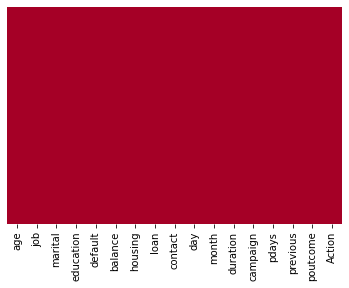

In [31]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')

In [32]:
new_data =  banking.select_dtypes(include='object')

In [33]:
new_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Action'],
      dtype='object')

In [34]:
#checking the number of uique categories in each column
for i in new_data.columns:
  print(new_data[i].value_counts())
  print("==============================")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [35]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [36]:
banking1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [37]:
banking1.shape

(45211, 17)

# K Best Features

In [38]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

In [39]:
X = banking1.iloc[:,0:16]
y = banking1['Action']


In [40]:
X.dtypes

age          int64
balance      int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
job          int64
marital      int64
education    int64
default      int64
housing      int64
loan         int64
contact      int64
month        int64
poutcome     int64
dtype: object

In [41]:
Kbest = SelectKBest(f_classif, 10)
kfit =Kbest.fit_transform(X,y)

In [42]:
kfit.shape

(45211, 10)

In [43]:
Kbest.scores_

array([  28.62523309,  126.57227551,   36.35900965, 8333.76114833,
        243.35840443,  490.69656268,  396.44398944,   74.04835143,
         94.1500255 ,  199.24282508,   22.73392322,  892.95057646,
        211.16739503, 1017.96593035,   27.08968938,  275.5968724 ])

In [44]:
Kbest.pvalues_

array([8.82564369e-008, 2.52111369e-029, 1.65388016e-009, 0.00000000e+000,
       1.01234736e-054, 3.79055332e-108, 7.80183035e-088, 7.86348864e-018,
       3.07484749e-022, 3.81133454e-045, 1.86632653e-006, 2.62192657e-194,
       9.79365754e-048, 6.39604160e-221, 1.95078221e-007, 1.04262910e-061])

In [45]:
scores = pd.DataFrame(Kbest.scores_)
columns = pd.DataFrame(X.columns)
pd.concat([scores,columns],axis=1)

,0,0
0,28.625233,age
1,126.572276,balance
2,36.359010,day
3,8333.761148,duration
4,243.358404,campaign
5,490.696563,pdays
6,396.443989,previous
7,74.048351,job
8,94.150026,marital
9,199.242825,education


In [46]:
# Train logistic regression model with subset of features from K Best
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(kfit, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y, lr.predict(kfit))

0.8880582159209042

In [48]:
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Forward Selection

In [49]:
# Train a logistic regression model here
X = banking1.iloc[:,0:16]
y = banking1['Action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
type(X_train)

pandas.core.frame.DataFrame

In [51]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
3957,31,-48,16,254,17,-1,0,0,2,1,0,1,0,2,8,3
26261,42,3,20,47,1,190,1,1,1,1,0,1,0,1,9,0
37695,29,6429,14,535,1,352,2,0,1,1,0,1,1,0,8,0
28708,34,1301,30,196,2,189,2,9,0,1,0,1,0,0,4,0
17064,31,-21,25,507,1,-1,0,7,2,1,1,0,1,0,5,3


In [52]:
y_train.head()

3957     0
26261    0
37695    0
28708    0
17064    0
Name: Action, dtype: int64

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
accuracy_score(y_test, lr.predict(X_test))

0.8843304213203583

In [55]:
accuracy_score(y_train, lr.predict(X_train))

0.8882990488829905

In [56]:
model_columns = X_train.columns

In [57]:
model_columns= list(model_columns)

In [58]:
model_columns

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [59]:
l= list(zip(lr.coef_[0], model_columns))

In [60]:
lr.coef_[0]

array([-2.39965275e-02,  3.64260086e-05, -1.65793043e-02,  3.48144282e-03,
       -3.33025812e-01, -9.16526760e-04,  1.30307463e-01,  1.55494624e-02,
       -1.09903690e-01, -1.01848572e-02, -6.73700906e-03, -2.21988132e-01,
       -6.45597294e-02, -2.26375374e-01, -6.80196193e-02, -2.14083089e-01])

In [61]:
l

[(-0.02399652753046183, 'age'),
 (3.6426008559824134e-05, 'balance'),
 (-0.01657930431646225, 'day'),
 (0.003481442821929296, 'duration'),
 (-0.333025812231894, 'campaign'),
 (-0.0009165267598542818, 'pdays'),
 (0.13030746297227844, 'previous'),
 (0.01554946243276311, 'job'),
 (-0.10990368985008447, 'marital'),
 (-0.01018485720174627, 'education'),
 (-0.006737009057591768, 'default'),
 (-0.221988132238179, 'housing'),
 (-0.06455972938004936, 'loan'),
 (-0.22637537383283823, 'contact'),
 (-0.06801961925236795, 'month'),
 (-0.2140830891400967, 'poutcome')]

In [62]:
arr =sorted(l, key=lambda x: abs(x[0]))

In [63]:
# Print the absolute weights of the model and sort them in descending order
arr.reverse()

In [64]:
arr

[(-0.333025812231894, 'campaign'),
 (-0.22637537383283823, 'contact'),
 (-0.221988132238179, 'housing'),
 (-0.2140830891400967, 'poutcome'),
 (0.13030746297227844, 'previous'),
 (-0.10990368985008447, 'marital'),
 (-0.06801961925236795, 'month'),
 (-0.06455972938004936, 'loan'),
 (-0.02399652753046183, 'age'),
 (-0.01657930431646225, 'day'),
 (0.01554946243276311, 'job'),
 (-0.01018485720174627, 'education'),
 (-0.006737009057591768, 'default'),
 (0.003481442821929296, 'duration'),
 (-0.0009165267598542818, 'pdays'),
 (3.6426008559824134e-05, 'balance')]

In [65]:
# Print the accuracies of all the models trained and names of the features used for each time

In [66]:
# Run a for loop where each time you train a new model by adding features (from no of features 1 to n) 
# with highest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 
test_accuracy =[]
train_accuracy =[]
for i in range(1,len(arr)+1):
    lst =[]
    for j in range(i):
        lst.append(arr[j][1])

        
    print(lst)
    x_train= X_train[lst]
    x_test = X_test[lst]
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    train_accuracy.append(accuracy_score(y_train, lr.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, lr.predict(x_test)))
    print("Training accuracy: ",accuracy_score(y_train, lr.predict(x_train)))
    print("Testing accuracy: ",accuracy_score(y_test, lr.predict(x_test)))
    print("-----------------------------------------------------")


['campaign']
Training accuracy:  0.8833499225834992
Testing accuracy:  0.8816764348114564
-----------------------------------------------------
['campaign', 'contact']
Training accuracy:  0.8833499225834992
Testing accuracy:  0.8816764348114564
-----------------------------------------------------
['campaign', 'contact', 'housing']
Training accuracy:  0.8833499225834992
Testing accuracy:  0.8816764348114564
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome']
Training accuracy:  0.8833499225834992
Testing accuracy:  0.8816764348114564
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous']
Training accuracy:  0.8830181375801813
Testing accuracy:  0.8813446864978436
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital']
Training accuracy:  0.8830457863304578
Testing accuracy:  0.8814552692690479
--------------------

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.8829904888299049
Testing accuracy:  0.8810129381842309
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.8831010838310108
Testing accuracy:  0.8811235209554351
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.8831010838310108
Testing accuracy:  0.8811235209554351
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.8830457863304578
Testing accuracy:  0.8813446864978436
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.8829075425790754
Testing accuracy:  0.8810129381842309
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default', 'duration']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.8903450564034505
Testing accuracy:  0.8842198385491541
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default', 'duration', 'pdays']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.8898750276487503
Testing accuracy:  0.8845515868627668
-----------------------------------------------------
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default', 'duration', 'pdays', 'balance']
Training accuracy:  0.8884096438840965
Testing accuracy:  0.8841092557779497
-----------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
y_tick= [x for x in range(1,17)]

In [68]:
y_tick

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [69]:
import matplotlib.pyplot as plt

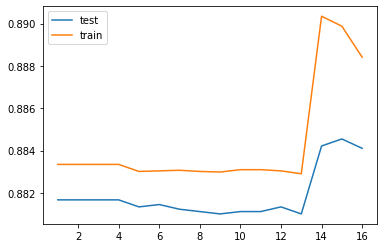

In [70]:
plt.plot(y_tick,test_accuracy, label= "test")
plt.plot(y_tick,train_accuracy , label="train")
plt.legend()
plt.show()

# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time
Ans : 13 features

# Backward Elimination

In [71]:
# Train a logistic regression model here
lr= LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
# Print the absolute weights of the model and sort them in ascending order
l = list(zip(lr.coef_[0], list(X_train.columns)))

In [73]:
l=sorted(l, key =lambda x:abs(x[0]) )

In [74]:
l.reverse()

In [75]:
l

[(-0.333025812231894, 'campaign'),
 (-0.22637537383283823, 'contact'),
 (-0.221988132238179, 'housing'),
 (-0.2140830891400967, 'poutcome'),
 (0.13030746297227844, 'previous'),
 (-0.10990368985008447, 'marital'),
 (-0.06801961925236795, 'month'),
 (-0.06455972938004936, 'loan'),
 (-0.02399652753046183, 'age'),
 (-0.01657930431646225, 'day'),
 (0.01554946243276311, 'job'),
 (-0.01018485720174627, 'education'),
 (-0.006737009057591768, 'default'),
 (0.003481442821929296, 'duration'),
 (-0.0009165267598542818, 'pdays'),
 (3.6426008559824134e-05, 'balance')]

In [76]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 
train_accuracy=[]
test_accuracy=[]
for i in range(len(l), 0, -1):
    lst =[]
    for j in range(i):
        lst.append(l[j][1])

        
    print(lst)
    x_train= X_train[lst]
    x_test = X_test[lst]
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    train_accuracy.append(accuracy_score(y_train, lr.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, lr.predict(x_test)))
    print("Train accuracy: ",accuracy_score(y_train, lr.predict(x_train)))
    print("Test accuracy: ",accuracy_score(y_test, lr.predict(x_test)))
    print("<============================>")

['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default', 'duration', 'pdays', 'balance']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8884096438840965
Test accuracy:  0.8841092557779497
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default', 'duration', 'pdays']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8898750276487503
Test accuracy:  0.8845515868627668
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default', 'duration']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8903450564034505
Test accuracy:  0.8842198385491541
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education', 'default']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8829075425790754
Test accuracy:  0.8810129381842309
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job', 'education']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8830457863304578
Test accuracy:  0.8813446864978436
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day', 'job']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8831010838310108
Test accuracy:  0.8811235209554351
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age', 'day']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8831010838310108
Test accuracy:  0.8811235209554351
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan', 'age']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:  0.8829904888299049
Test accuracy:  0.8810129381842309
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month', 'loan']
Train accuracy:  0.8830181375801813
Test accuracy:  0.8811235209554351
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital', 'month']
Train accuracy:  0.8830734350807343
Test accuracy:  0.8812341037266394
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous', 'marital']
Train accuracy:  0.8830457863304578
Test accuracy:  0.8814552692690479
<============================>
['campaign', 'contact', 'housing', 'poutcome', 'previous']
Train accuracy:  0.8830181375801813
Test accuracy:  0.8813446864978436
<============================>
['campaign', 'contact', 'housing', 'poutcome']
Train accuracy:  0.8833499225834992
Test accuracy:  0.8816764348114564
<============================>
['campaign', 'contact', 'housing']
Train accur

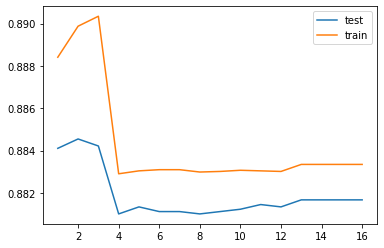

In [77]:
# Print the accuracies of all the models trained and names of the features used for each time
plt.plot(y_tick,test_accuracy, label= "test")
plt.plot(y_tick,train_accuracy , label="train")
plt.legend()
plt.show()

# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time
2


# Recursive Feature Elimination. 
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [78]:
X = banking1.drop(columns = ['Action'], axis = 1)
y = banking1['Action']
logit = LogisticRegression(class_weight = 'balanced', max_iter = 4000)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [80]:
rfe = RFE(estimator = logit, step=1) # by default half of the features are selected
rfe = rfe.fit(X_train, y_train)

In [81]:
cols = pd.DataFrame(X_train.columns)
ranking = pd.DataFrame(rfe.ranking_)

In [82]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [83]:
rankings_of_features

,0,0
0,age,5
1,balance,9
2,day,4
3,duration,6
4,campaign,1
5,pdays,8
6,previous,1
7,job,7
8,marital,1
9,education,1


In [85]:
rankings_of_features.columns = ['Feature name', 'Rank Order']

In [86]:
rankings_of_features

,Feature name,Rank Order
0,age,5
1,balance,9
2,day,4
3,duration,6
4,campaign,1
5,pdays,8
6,previous,1
7,job,7
8,marital,1
9,education,1


In [88]:
print(rankings_of_features.nlargest(5,'Rank Order'))
#remember this gives wrong results

  Feature name  Rank Order
1      balance           9
5        pdays           8
7          job           7
3     duration           6
0          age           5


In [90]:
rankings_of_features.sort_values(by='Rank Order')

,Feature name,Rank Order
4,campaign,1
6,previous,1
8,marital,1
9,education,1
10,default,1
11,housing,1
12,loan,1
13,contact,1
15,poutcome,2
14,month,3


In [91]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(X_train)
X_testRFE = rfe.transform(X_test)

In [92]:
model = logit.fit(X_trainRFE, y_train)

In [93]:
# evaluating the model on training data.
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_trainRFE)
print("Accuracy on Training data: ", accuracy_score(y_train, y_pred_train))

Accuracy on Training data:  0.6356368692135116


In [94]:
logit.predict(X_testRFE)

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
# evaluating the model on testing data.
from sklearn.metrics import accuracy_score
y_pred_test = model.predict(X_testRFE)
print("Accuracy on Training data: ", accuracy_score(y_test, y_pred_test))

Accuracy on Training data:  0.6308611029194928


In [96]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [97]:
#score = logit.score(X_test_rfecv, y_test)
score = cross_val_score(model, X_testRFE, y_test) 
print(score)

[0.63730188 0.62182086 0.62550682 0.63803907 0.62684366]


In [98]:
print(np.mean(score))

0.6299024580654491


# RFE using cross validation

In [99]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

In [100]:
rfecv.grid_scores_

array([0.58817545, 0.64157704, 0.63061026, 0.58592688, 0.62852761,
       0.63393063, 0.63588959, 0.63538396, 0.6417984 , 0.63073897,
       0.63175006, 0.63077052, 0.73425682, 0.80386742, 0.80573176,
       0.79713695])

In [101]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [102]:
model = logit.fit(X_train_rfecv, y_train)

In [103]:
# evaluating the model on training data.
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train_rfecv)
print("Accuracy on Training data: ", accuracy_score(y_train, y_pred_train))

Accuracy on Training data:  0.8061427623471419


In [104]:
# evaluating the model on testing data.
from sklearn.metrics import accuracy_score
y_pred_test = model.predict(X_test_rfecv)
print("Accuracy on Training data: ", accuracy_score(y_test, y_pred_test))

Accuracy on Training data:  0.8073577115895016


In [105]:
y_pred_RFECV = logit.predict(X_test_rfecv)

In [106]:
#score = logit.score(X_test_rfecv, y_test)
score = cross_val_score(model, X_test_rfecv, y_test) 
print(score)

[0.81164762 0.8053815  0.81275341 0.80685588 0.80899705]


In [107]:
print(np.mean(score))

0.8091270915628564
